# Data Assignment

#### This assignment consists of two files. I will read both csv files into dataframes.
* For "copackager_table.csv", job.id will be the index
* For "customer_unit_of_measure_conversions.csv", customer will be the index

**Below are the first 5 rows of the 'copackager_table.csv'**:

In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
# reading in "copackager_table.csv" into a dataframe and setting the index to job.id
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

filepath = "C:\\Users\\Joash\\Downloads\\DA Assignment 2018\\"
data = pd.read_csv(filepath + "copackager_table.csv")
data = data.set_index(['job.id'])
data.head()

,purchase.order.received.date,materials.availablity.date,production.started.date,production.completed.date,quantity.produced,unit.of.measure,shipment.shipped.date,OTIF,customer
job.id,,,,,,,,,
1,2017-12-30 10:52,2018-01-04 8:45,2018-01-08 1:57,2018-01-08 7:30,110,pallets,2018-01-10 6:31,0,Unilever
2,2017-12-02 4:59,2017-12-05 19:30,2017-12-07 7:38,2017-12-07 22:32,102,pallets,2017-12-10 8:09,1,Unilever
3,2017-10-18 8:25,2017-10-20 6:04,2017-10-24 6:32,2017-10-24 20:27,81,pallets,2017-10-26 5:16,0,Procter & Gamble
4,2017-06-23 9:45,2017-06-27 8:23,2017-06-30 6:57,2017-06-30 19:36,429,cases,2017-07-03 11:30,0,Unilever
5,2017-08-22 19:21,2017-08-26 3:57,2017-08-29 1:43,2017-08-29 7:09,489,cases,2017-08-30 6:50,1,Procter & Gamble


**Below is the "customer_unit_of_measure_conversions.csv"**:

In [4]:
# reading in "customer_unit_of_measure_conversions.csv"
conversion = pd.read_csv(filepath + "customer_unit_of_measure_conversions.csv")
conversion = conversion.set_index(['customer'])
conversion

,cases.to.eaches.conversion,pallets.to.cases.conversion,pallets.to.eaches.conversion
customer,,,
Procter & Gamble,2,6,12
Unilever,3,5,15


## Step 1: Data Cleaning

There are three units of measure in the 'unit.of.measure' column. In a column called **'quantity.produced.eaches'**, I will standardize quantity produced in **eaches**. 

**Below are the first 5 rows of the 'copackager_table.csv' after adding the 'quantity.produced.eaches' column**:

In [5]:
# Conversion of all cases and pallets to eaches in "quantity.produced.eaches" column
for index, row in conversion.iterrows():
    data.loc[(data.customer==index) & (data['unit.of.measure']=="cases"), 'quantity.produced.eaches'] = data['quantity.produced']*row['cases.to.eaches.conversion']
    data.loc[(data.customer==index) & (data['unit.of.measure']=="pallets"), 'quantity.produced.eaches'] = data['quantity.produced']*row['pallets.to.eaches.conversion']
    data.loc[(data.customer==index) & (data['unit.of.measure']=="eaches"), 'quantity.produced.eaches'] = data['quantity.produced']

data.head()

,purchase.order.received.date,materials.availablity.date,production.started.date,production.completed.date,quantity.produced,unit.of.measure,shipment.shipped.date,OTIF,customer,quantity.produced.eaches
job.id,,,,,,,,,,
1,2017-12-30 10:52,2018-01-04 8:45,2018-01-08 1:57,2018-01-08 7:30,110,pallets,2018-01-10 6:31,0,Unilever,1650.0
2,2017-12-02 4:59,2017-12-05 19:30,2017-12-07 7:38,2017-12-07 22:32,102,pallets,2017-12-10 8:09,1,Unilever,1530.0
3,2017-10-18 8:25,2017-10-20 6:04,2017-10-24 6:32,2017-10-24 20:27,81,pallets,2017-10-26 5:16,0,Procter & Gamble,972.0
4,2017-06-23 9:45,2017-06-27 8:23,2017-06-30 6:57,2017-06-30 19:36,429,cases,2017-07-03 11:30,0,Unilever,1287.0
5,2017-08-22 19:21,2017-08-26 3:57,2017-08-29 1:43,2017-08-29 7:09,489,cases,2017-08-30 6:50,1,Procter & Gamble,978.0


Furthermore, there are **five** columns that have date values in them. These are:
* purchase.order.received.date
* materials.availablity.date
* production.started.date
* production.completed.date
* shipment.shipped.date

**All of these columns will be converted to datetime type which can be seen in the table below**:

In [6]:
# convert to datetime format
data['purchase.order.received.date'] = pd.to_datetime(data['purchase.order.received.date'], yearfirst=True)
data['materials.availablity.date'] = pd.to_datetime(data['materials.availablity.date'], yearfirst=True)
data['production.started.date'] = pd.to_datetime(data['production.started.date'], yearfirst=True)
data['production.completed.date'] = pd.to_datetime(data['production.completed.date'], yearfirst=True)
data['shipment.shipped.date'] = pd.to_datetime(data['shipment.shipped.date'], yearfirst=True)
data.head()

,purchase.order.received.date,materials.availablity.date,production.started.date,production.completed.date,quantity.produced,unit.of.measure,shipment.shipped.date,OTIF,customer,quantity.produced.eaches
job.id,,,,,,,,,,
1,2017-12-30 10:52:00,2018-01-04 08:45:00,2018-01-08 01:57:00,2018-01-08 07:30:00,110,pallets,2018-01-10 06:31:00,0,Unilever,1650.0
2,2017-12-02 04:59:00,2017-12-05 19:30:00,2017-12-07 07:38:00,2017-12-07 22:32:00,102,pallets,2017-12-10 08:09:00,1,Unilever,1530.0
3,2017-10-18 08:25:00,2017-10-20 06:04:00,2017-10-24 06:32:00,2017-10-24 20:27:00,81,pallets,2017-10-26 05:16:00,0,Procter & Gamble,972.0
4,2017-06-23 09:45:00,2017-06-27 08:23:00,2017-06-30 06:57:00,2017-06-30 19:36:00,429,cases,2017-07-03 11:30:00,0,Unilever,1287.0
5,2017-08-22 19:21:00,2017-08-26 03:57:00,2017-08-29 01:43:00,2017-08-29 07:09:00,489,cases,2017-08-30 06:50:00,1,Procter & Gamble,978.0


## Step 2: Exploratory Data Analysis

Currently, I do not see any other columns that need extensive cleaning. I will move on to the next phase and describe the data. Let's start by taking a look at the following:

1. **Number of jobs** in the dataset
2. **Date range** of the dataset
3. Number of **customers** that are present in the dataset and the number of jobs allocated to each customer
4. **OTIF** counts of 1 and 0

**Following is the code output**:

1. There are 1200 unique orders in the dataset.

2. The dataset contains 363 days worth of orders from two customers.


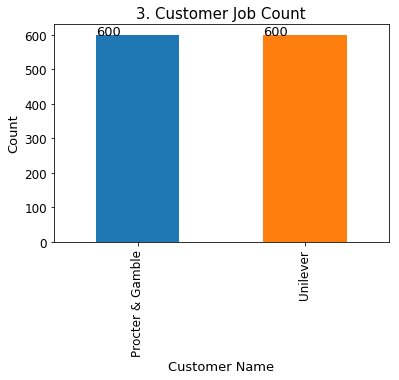

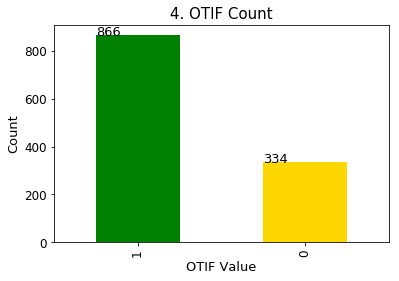

In [7]:
# Getting number of jobs in the dataset
unique_rows = data.shape[0]
print("1. There are", unique_rows, "unique orders in the dataset.")

# Getting the date range of the dataset in days
range_of_date = (data['purchase.order.received.date'].max() - data['purchase.order.received.date'].min()).days
print()
print("2. The dataset contains", range_of_date, "days worth of orders from two customers.")

# Ploting unique values and their counts of customer column
customer_count = data['customer'].value_counts()
customer_plt = customer_count.plot(kind='bar', fontsize=12)
customer_plt.set_title("3. Customer Job Count", fontsize=15)
customer_plt.set_ylabel("Count", fontsize=13)
customer_plt.set_xlabel("Customer Name", fontsize=13)

for i in customer_plt.patches:
    customer_plt.annotate(str(i.get_height()), (i.get_x(), i.get_height()), fontsize=13)
plt.show()

# Ploting unique values and their counts of OTIF column
otif_count = data['OTIF'].value_counts()
otif_plt = otif_count.plot(kind='bar', fontsize=12, color = [ 'g', 'gold'])
otif_plt.set_title("4. OTIF Count", fontsize=15)
otif_plt.set_ylabel("Count", fontsize=13)
otif_plt.set_xlabel("OTIF Value", fontsize=13)

for i in otif_plt.patches:
    otif_plt.annotate(str(i.get_height()), (i.get_x(), i.get_height()), fontsize=13)
plt.show()

The dataset consist of **1200** unique job orders for a total of **two customers**; Proctor & Gamble and Unilever. The range of the dataset is **363 days (1 year)**. Within a year, **equal amount of jobs** orders were allocated to each customer **(600 each)**. **866** out of 1200 jobs arrived to the customer on-time.

Let's take a deeper look into the **"OTIF"** column by calculating some probabilities:
5. Overall OTIF probability
6. OTIF probability by customer

**Following is the code output**:

1. The overall OTIF probability for all customers is 0.72


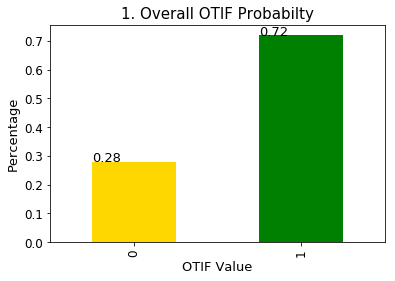

2. OTIF probability for Unilever is 0.74
2. OTIF probability for Procter & Gamble is 0.7


In [8]:
# Probability of co-packager shipping shipments on time
otif_prob = round(data.groupby('OTIF').size().div(len(data)),2)
print("1. The overall OTIF probability for all customers is", otif_prob[1])

otif_plt2 = otif_prob.plot(kind='bar', fontsize=12, color = ['gold', 'g'])
otif_plt2.set_title("1. Overall OTIF Probabilty", fontsize=15)
otif_plt2.set_ylabel("Percentage", fontsize=13)
otif_plt2.set_xlabel("OTIF Value", fontsize=13)

for i in otif_plt2.patches:
    otif_plt2.annotate(str(i.get_height()), (i.get_x(), i.get_height()), fontsize=13)
plt.show()

# Probability of co-packager shipping shipments on time grouped by customer
for i in data['customer'].unique():
    otif_prob_cus = round(data[data['customer'] == i].groupby('OTIF').size().div(len(data[data['customer'] == i])),2)
    print("2. OTIF probability for", i, "is", otif_prob_cus[1])

The OTIF probabilty for the contract packager is 72%. In addition, the difference in the OTIF probabilty between the two customers is **4% (P&G: 70%; Unilever: 74%)**. The OTIF probability of each customer is not significantly different from the overall OTIF probabilty. This shows that the contract packager has an OTIF probability of 72% independent of customer name.

Next step is to take a look at the **quantity produced in eaches** column:
1. Average and median quantity produced in eaches
2. Average quantity produced in eaches by customer
3. Sum of order in eaches by customer
4. Histogram of all orders in eaches

**Following is the code output**:

1. The average and median order in eaches is 1054.44 and 974.0 respectively,



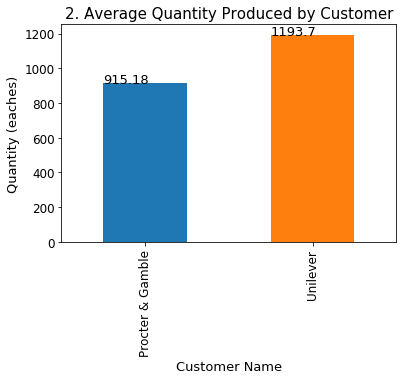

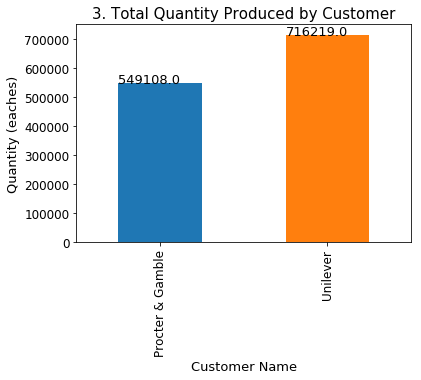

Text(0,0.5,'Frequency')

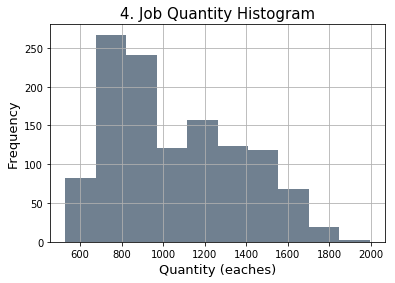

In [9]:
# Viewing at the average ordered quantity
avg_ord_eaches = round(data['quantity.produced.eaches'].mean(),2)
med_ord_eaches = round(data['quantity.produced.eaches'].median(),2)
print("1. The average and median order in eaches is", avg_ord_eaches, "and", med_ord_eaches, "respectively,")
print()

# Plotting average order quantity by customer
avg_ord_cust = round(data.groupby('customer')['quantity.produced.eaches'].mean(),2)
avg_ord_cust_plt = avg_ord_cust.plot(kind='bar', fontsize=12)
avg_ord_cust_plt.set_title("2. Average Quantity Produced by Customer", fontsize=15)
avg_ord_cust_plt.set_ylabel("Quantity (eaches)", fontsize=13)
avg_ord_cust_plt.set_xlabel("Customer Name", fontsize=13)

for i in avg_ord_cust_plt.patches:
    avg_ord_cust_plt.annotate(str(i.get_height()), (i.get_x(), i.get_height()), fontsize=13)
plt.show()

print()
# Plotting sum of order quantity by customer
sum_ord_cust = round(data.groupby('customer')['quantity.produced.eaches'].sum(),2)
sum_ord_cust_plt = sum_ord_cust.plot(kind='bar', fontsize=12)
sum_ord_cust_plt.set_title("3. Total Quantity Produced by Customer", fontsize=15)
sum_ord_cust_plt.set_ylabel("Quantity (eaches)", fontsize=13)
sum_ord_cust_plt.set_xlabel("Customer Name", fontsize=13)

for i in sum_ord_cust_plt.patches:
    sum_ord_cust_plt.annotate(str(i.get_height()), (i.get_x(), i.get_height()), fontsize=13)
plt.show()

# Histogram of job orders in eaches
quantity_hist = data['quantity.produced.eaches'].plot(kind='hist', grid=True, bins=10, color='slategray')
quantity_hist.set_title("4. Job Quantity Histogram", fontsize=15)
quantity_hist.set_xlabel("Quantity (eaches)", fontsize=13)
quantity_hist.set_ylabel("Frequency", fontsize=13)



The average and median quantity produced in eaches is **1055** and **974** (rounded up as you cannot have decimals in eaches). From the bar plots above, Unilever has a **higher average quantity produced** (1,194 eaches) and **total quantity produced** (716,219 eaches) in comparison to P&G (916 and 549,108). Furthermore, the "Job Quantity Histogram" plot is right-skewed portraying that most job quantities are lower and range between 700-1000 eaches.


I will shift my focus to the date columns. Since the dates are simplified by the job life cycle of a contract packager, it will be interesting to note the duration between these dates. I will get the average duration (in days) from:

* **Purchase order recieved to shipment of products** (po-prod.ship.days)
* **Purchase order recieved to material availability** (po-prod.matavail.days)
* **Material availability to production started** (matavail.prodstarted.days)
* **Production started to production completed** (prodstarted.prodcompleted.days)
* **Production completed to shipment of products** (prodstarted.prodcompleted.days)

**Below are the first 5 rows of the 'copackager_table.csv' after adding the the duration columns**:

In [10]:
# Let's look at the average time it takes to complete the end-to-end process from PO to shipment of goods
data['po-prod.ship.days'] = round(((data['shipment.shipped.date'] - data['purchase.order.received.date']).astype('timedelta64[h]'))/24,2)

data['po-prod.matavail.days'] = round(((data['materials.availablity.date'] - data['purchase.order.received.date']).astype('timedelta64[h]'))/24,2)

data['matavail.prodstarted.days'] = round(((data['production.started.date'] - data['materials.availablity.date']).astype('timedelta64[h]'))/24,2)

data['prodstarted.prodcompleted.days'] = round(((data['production.completed.date'] - data['production.started.date']).astype('timedelta64[h]'))/24,2)

data['prodcompleted.ship.days'] = round(((data['shipment.shipped.date'] - data['production.completed.date']).astype('timedelta64[h]'))/24,2)
data.head()

,purchase.order.received.date,materials.availablity.date,production.started.date,production.completed.date,quantity.produced,unit.of.measure,shipment.shipped.date,OTIF,customer,quantity.produced.eaches,po-prod.ship.days,po-prod.matavail.days,matavail.prodstarted.days,prodstarted.prodcompleted.days,prodcompleted.ship.days
job.id,,,,,,,,,,,,,,,
1,2017-12-30 10:52:00,2018-01-04 08:45:00,2018-01-08 01:57:00,2018-01-08 07:30:00,110,pallets,2018-01-10 06:31:00,0,Unilever,1650.0,10.79,4.88,3.71,0.21,1.96
2,2017-12-02 04:59:00,2017-12-05 19:30:00,2017-12-07 07:38:00,2017-12-07 22:32:00,102,pallets,2017-12-10 08:09:00,1,Unilever,1530.0,8.12,3.58,1.50,0.58,2.38
3,2017-10-18 08:25:00,2017-10-20 06:04:00,2017-10-24 06:32:00,2017-10-24 20:27:00,81,pallets,2017-10-26 05:16:00,0,Procter & Gamble,972.0,7.83,1.88,4.00,0.54,1.33
4,2017-06-23 09:45:00,2017-06-27 08:23:00,2017-06-30 06:57:00,2017-06-30 19:36:00,429,cases,2017-07-03 11:30:00,0,Unilever,1287.0,10.04,3.92,2.92,0.50,2.62
5,2017-08-22 19:21:00,2017-08-26 03:57:00,2017-08-29 01:43:00,2017-08-29 07:09:00,489,cases,2017-08-30 06:50:00,1,Procter & Gamble,978.0,7.46,3.33,2.88,0.21,0.96


**Histograms for the following duration columns are present below**:
1. Purchase order recieved to material availability
2. Material availability to production started
3. Production completed to shipment of products
4. Total duration (purchase order completed to shipment of products)

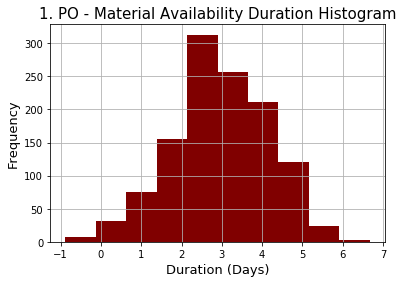

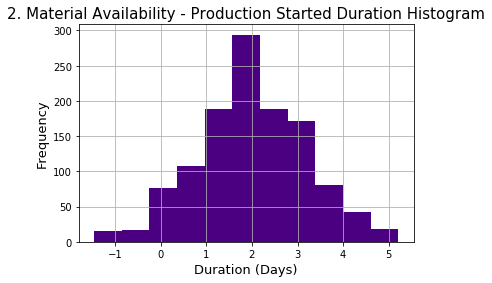

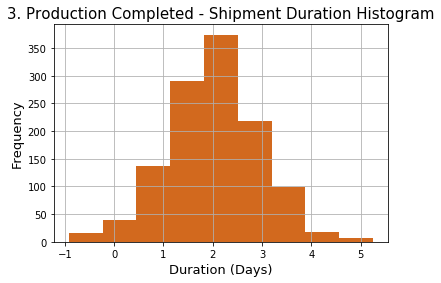

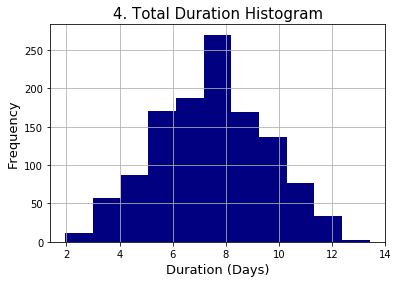

In [11]:
# plotting Purchase order - Materials availability duration histogram
po_material_hist = data['po-prod.matavail.days'].plot(kind='hist', grid=True, bins=10, color='maroon')
po_material_hist.set_title("1. PO - Material Availability Duration Histogram", fontsize=15)
po_material_hist.set_xlabel("Duration (Days)", fontsize=13)
po_material_hist.set_ylabel("Frequency", fontsize=13)
plt.show()

# plotting Material Availability - Production Started duration histogram
material_prod_start_hist = data['matavail.prodstarted.days'].plot(kind='hist', grid=True, bins=11, color='indigo')
material_prod_start_hist.set_title("2. Material Availability - Production Started Duration Histogram", fontsize=15)
material_prod_start_hist.set_xlabel("Duration (Days)", fontsize=13)
material_prod_start_hist.set_ylabel("Frequency", fontsize=13)
plt.show()

# plotting Production Completed - Shipment duration histogram
prod_comp_ship_hist = data['prodcompleted.ship.days'].plot(kind='hist', grid=True, bins=9, color='chocolate')
prod_comp_ship_hist.set_title("3. Production Completed - Shipment Duration Histogram", fontsize=15)
prod_comp_ship_hist.set_xlabel("Duration (Days)", fontsize=13)
prod_comp_ship_hist.set_ylabel("Frequency", fontsize=13)
plt.show()

# plotting total duration histogram
quantity_hist = data['po-prod.ship.days'].plot(kind='hist', grid=True, bins=11, color='navy')
quantity_hist.set_title("4. Total Duration Histogram", fontsize=15)
quantity_hist.set_xlabel("Duration (Days)", fontsize=13)
quantity_hist.set_ylabel("Frequency", fontsize=13)
plt.show()

All of the histograms plotted above represent a **bell shaped curve**. The "PO - Material Availability Duration Histogram" peaks between **2 to 3 days**. The "Material Availability - Production Started Duration Histogram" and "Production Completed - Shipment Duration Histogram" both peak between **1.5 to 2.5 days**. The "Total Duration Histogram" ranges from **2 to 13 days** and peaks between **6.5 and 7.5 days**. 

However, the "Material Availability - Production Started Duration Histogram" has **zero and negative duration values**. **I assume that the duration values between the dates cannot be negative or zero.** Let's view how many rows in the dataset have a zero or negative duration value for all the duration columns made earlier.

**Below are the result of the code output and the rows containing at least one zero or negative duration value**:

In [12]:
count_neg = data[(data['po-prod.ship.days'] <= 0) | (data['prodstarted.prodcompleted.days'] <= 0) | (data['po-prod.matavail.days'] <= 0) | (data['matavail.prodstarted.days'] <= 0) | (data['prodcompleted.ship.days'] <= 0)]
print('A total of', count_neg.shape[0], 'rows have zero or negative durations in at least one of the five duration columns.')
count_neg

A total of 116 rows have zero or negative durations in at least one of the five duration columns.


,purchase.order.received.date,materials.availablity.date,production.started.date,production.completed.date,quantity.produced,unit.of.measure,shipment.shipped.date,OTIF,customer,quantity.produced.eaches,po-prod.ship.days,po-prod.matavail.days,matavail.prodstarted.days,prodstarted.prodcompleted.days,prodcompleted.ship.days
job.id,,,,,,,,,,,,,,,
27,2017-12-12 14:24:00,2017-12-12 13:18:00,2017-12-15 18:09:00,2017-12-16 03:14:00,104,pallets,2017-12-18 08:11:00,0,Unilever,1560.0,5.71,-0.08,3.17,0.38,2.17
29,2017-05-02 09:46:00,2017-05-07 05:13:00,2017-05-09 10:09:00,2017-05-09 19:35:00,469,cases,2017-05-08 21:38:00,0,Procter & Gamble,938.0,6.46,4.79,2.17,0.38,-0.92
34,2017-01-11 07:43:00,2017-01-15 22:39:00,2017-01-15 22:39:00,2017-01-16 09:28:00,843,eaches,2017-01-18 15:23:00,1,Procter & Gamble,843.0,7.29,4.58,0.00,0.42,2.21
38,2017-12-29 05:15:00,2018-01-02 09:40:00,2018-01-01 05:17:00,2018-01-01 13:31:00,117,pallets,2018-01-03 21:27:00,1,Unilever,1755.0,5.67,4.17,-1.21,0.33,2.29
53,2017-01-16 17:53:00,2017-01-21 04:01:00,2017-01-24 20:13:00,2017-01-25 01:56:00,723,eaches,2017-01-25 02:21:00,0,Unilever,723.0,8.33,4.42,3.67,0.21,0.00
59,2017-07-25 09:11:00,2017-07-27 13:31:00,2017-07-29 22:38:00,2017-07-30 09:20:00,317,cases,2017-07-30 03:39:00,1,Unilever,951.0,4.75,2.17,2.38,0.42,-0.25
100,2017-08-12 18:56:00,2017-08-15 02:02:00,2017-08-14 22:13:00,2017-08-15 04:27:00,405,cases,2017-08-17 08:14:00,1,Unilever,1215.0,4.54,2.29,-0.17,0.25,2.12
102,2017-03-30 09:42:00,2017-04-04 00:06:00,2017-04-06 04:23:00,2017-04-06 05:07:00,875,eaches,2017-04-07 21:49:00,0,Unilever,875.0,8.50,4.58,2.17,0.00,1.67
103,2017-02-01 06:14:00,2017-02-04 13:33:00,2017-02-07 19:53:00,2017-02-08 03:42:00,741,eaches,2017-02-07 06:12:00,1,Unilever,741.0,5.96,3.29,3.25,0.29,-0.92


The difference between the following columns have zero and negative duration values:
* materials.availablity.date and purchase.order.received.date (13 rows)
* production.started.date and materials.availablity.date (57 rows)
* shipment.shipped.date and production.completed.date (29 rows)
* production.started.date and production.completed.date (18 rows)

The reason the zero or negative duration values were not apparent in some of the histograms is due to their low frequency. 

A total of  **116 rows** (approx 10% of the dataset) have negative duration values. I will **not delete** these rows as the dataset only has 1200 rows. Instead, I will replace each zero or negative value in the row with the column average (column averages will not include the negative and zero duration values in the calculation).

**Following is the code output after replace zero or negative values**:

In [13]:
shift_avg = round(data[data['prodstarted.prodcompleted.days']>0].mean(),2)
data.loc[data['prodstarted.prodcompleted.days'] <= 0 ,'prodstarted.prodcompleted.days'] = shift_avg

po_prod_matavail_avg = round(data[data['po-prod.matavail.days']>0].mean(),2)
data.loc[data['po-prod.matavail.days'] <= 0 ,'po-prod.matavail.days'] = po_prod_matavail_avg

matavail_prodstarted_avg = round(data[data['matavail.prodstarted.days']>0].mean(),2)
data.loc[data['matavail.prodstarted.days'] <= 0 ,'matavail.prodstarted.days'] = matavail_prodstarted_avg

prodcompleted_ship_avg = round(data[data['prodcompleted.ship.days']>0].mean(),2)
data.loc[data['prodcompleted.ship.days'] <= 0 ,'prodcompleted.ship.days'] = prodcompleted_ship_avg

shape = data[(data['prodstarted.prodcompleted.days'] <= 0) | (data['po-prod.matavail.days'] <= 0) | (data['matavail.prodstarted.days'] <= 0) | (data['prodcompleted.ship.days'] <= 0)].shape[0]
print(shape, 'rows have zero or negative durations.')

0 rows have zero or negative durations.


Now that the duration columns are clean, let's get some general information about them.

**The table below displays the averages of each newly created column**:

In [14]:
round(data[['po-prod.ship.days', 'po-prod.matavail.days', 'matavail.prodstarted.days', 'prodstarted.prodcompleted.days', 'prodcompleted.ship.days']].mean(),2)

po-prod.ship.days                 7.45
po-prod.matavail.days             3.02
matavail.prodstarted.days         2.13
prodstarted.prodcompleted.days    0.39
prodcompleted.ship.days           2.08
dtype: float64

The duration between the **purchase order recieve date to shipment date** represents the **end-to-end proccess** for the contract packager. On average, this process takes the contract packager **7.45 days** to complete. The **bottleneck** of the contract packager's process is the time between** recieving the purchase order and material availability** as this takes about **3 days**. After the materials are available, it takes the packager on **average of two days to start production**. This could be due to scheduling constraints as other jobs can have a higher priority. Once production is complete, it takes **on average two days** to **ship** the finished goods off to the customer. Some reasons why this process takes two days could be due to the shipment company scheduling constraints or contract packager forecasting additional time for production in case of delays. 

**Let's look at the average durations by customer shown in the following table**:

In [15]:
round(data.groupby('customer')[['po-prod.ship.days', 'po-prod.matavail.days', 'matavail.prodstarted.days', 'prodstarted.prodcompleted.days', 'prodcompleted.ship.days']].mean(),2)

,po-prod.ship.days,po-prod.matavail.days,matavail.prodstarted.days,prodstarted.prodcompleted.days,prodcompleted.ship.days
customer,,,,,
Procter & Gamble,7.46,3.02,2.15,0.39,2.09
Unilever,7.45,3.01,2.12,0.40,2.07


The average durations by customer are very similar. One interesting note is the duration between production start and completed date (in days) is slightly higher for Unilever. This is due to the higher average quantity produced in eaches for Unilever (1194 eaches) in comparison to P&G (916 eaches).

Next, I will focus on production.started.date and production.completed.date columns. In the instructions, it mentions that production can take anywhere from **less than an hour to over 16 hours**. I will make a column to display the difference between production completed and started date in the format of **hours**. With this column, I will perform the following:
1. Display the average and median
2. Plot a histogram of the shift duration

**Following is the code output**:

1. The average and median shift duration are 9.4 and 9.0 respectively.


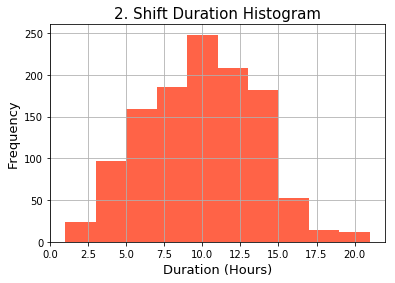

In [16]:
data['prodstarted.prodcompleted.hours'] = round(((data['production.completed.date'] - data['production.started.date']).astype('timedelta64[h]')),2)
shift_avg = round(data[data['prodstarted.prodcompleted.hours']>0].mean(),2)
data.loc[data['prodstarted.prodcompleted.hours'] <= 0 ,'prodstarted.prodcompleted.hours'] = shift_avg

shift_mean = round(data['prodstarted.prodcompleted.hours'].mean(),2)
shift_med = round(data['prodstarted.prodcompleted.hours'].median(),2)

print("1. The average and median shift duration are", shift_mean, "and", shift_med, "respectively.")

# plotting shift duration histogram
shift_hist = data['prodstarted.prodcompleted.hours'].plot(kind='hist', grid=True, bins=10, color='tomato')
shift_hist.set_title("2. Shift Duration Histogram", fontsize=15)
shift_hist.set_xlabel("Duration (Hours)", fontsize=13)
shift_hist.set_ylabel("Frequency", fontsize=13)
plt.show()

The "Shift Duration Histogram" represents a bell shaped curve which means that the durations are normally distributed. The histogram peaks between 9 and 11 hours. The average and median shift duration are 9.4 and 9.0 hours.

Lastly, I will graph **scatter plots** to note if there is any relationship between:
1. Shift duration vs quantity produced (from production start to completed time)
2. Total job duration vs quantity produced (from purchase order to shipment of products)

**Following is the code output**:

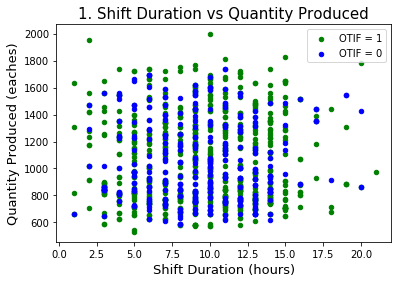

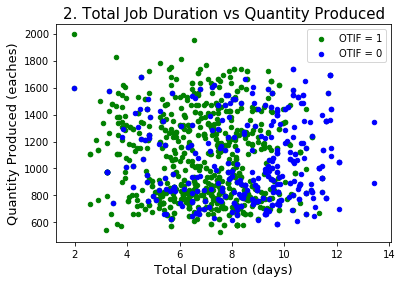

In [17]:
data_otif_1 = data[data['OTIF'] == 1]
data_otif_0 = data[data['OTIF'] == 0]        
production_duration = data_otif_1.plot(kind="scatter", x='prodstarted.prodcompleted.hours', y='quantity.produced.eaches',c='g', label = 'OTIF = 1')
data_otif_0.plot(kind="scatter", x='prodstarted.prodcompleted.hours', y='quantity.produced.eaches',c='b', label = 'OTIF = 0', ax = production_duration)
production_duration.set_title("1. Shift Duration vs Quantity Produced", fontsize=15)
production_duration.set_ylabel("Quantity Produced (eaches)", fontsize=13)
production_duration.set_xlabel("Shift Duration (hours)", fontsize=13)
plt.show()


total_duration = data_otif_1.plot( kind="scatter", x='po-prod.ship.days', y='quantity.produced.eaches', c = 'g', label = 'OTIF = 1')
data_otif_0.plot( kind="scatter", x='po-prod.ship.days', y='quantity.produced.eaches', c = 'b', label = 'OTIF = 0', ax=total_duration)
total_duration.set_title("2. Total Job Duration vs Quantity Produced", fontsize=15)
total_duration.set_ylabel("Quantity Produced (eaches)", fontsize=13)
total_duration.set_xlabel("Total Duration (days)", fontsize=13)

plt.show()

In the plots above, *green* and *blue* represent an OTIF value of 1 and 0 respectively. It is evident that there is no linear relationship between **Total Duration** or **Shift Duration** vs **Quantity Produced**. This portrays the complexity in cycle times of different contract packaging jobs. For example, in the **Shift Duration vs Quantity Produced** plot, jobs with quantities of 600 eaches can take approximately 1-to-17.5 hours to complete depending on the work required for the job order. 

For the **Total Duration vs Quantity Produced** plot, the green points stay more on the right and the blue points on the left of the plot. Thus, if the supplier hopes to increase the probability of OTIF, the total duration of the job order (in days) should be reduced. In addition, the fact that there is no evidence of a relationship between quantity produced vs total duration show that many factors affect the total duration of a job order such as time taken to acquire needed materials, scheduling of job orders, production time and shipping company time constraints to name a few.


## Step 3: Questions
### Question 1: What is the average shift length?

For simplicity, I will assume that the duration between production completed and production started date is equivalent to one shift as mentioned in the instruction. Note, I have replaced zero or negative shift durations with column averages above.

**Following is the code output**:

In [18]:
print("The average shift length is", round(data['prodstarted.prodcompleted.hours'].mean(),2), "hours.")

The average shift length is 9.4 hours.


#### Answer 1: 9.4 hours

### Question 2a: What is the change in probability of OTIF 3 days after receiving the PO vs 4 days?

OTIF means the order is delivered on time in full. I will assume that the three days after recieving the purchase order  means that the **order shipment date is within 3 days or less**. Same goes for the 4 days.

**Following is the code output**:

In [19]:
# Probability for OTIF after 3 days of recieving the PO 
df_otif_3 = data[data['po-prod.ship.days'] <=3]
prob_otif_3 = df_otif_3[df_otif_3['OTIF'] == 1].shape[0]/df_otif_3.shape[0]
print('Probability of OTIF 3 days after recieving the purchase order is', round(prob_otif_3,2), ".")
print()

# Probability for OTIF after 4 days of recieving the PO
df_otif_4 = data[data['po-prod.ship.days'] <=4]
prob_otif_4 = df_otif_4[df_otif_4['OTIF'] == 1].shape[0]/df_otif_4.shape[0]
print('Probability of OTIF 4 days after recieving the purchase order is',round(prob_otif_4,2), ".")
print()
print("Change in probability of OTIF 3 days after receiving the PO vs 4 days is", round((prob_otif_3-prob_otif_4)*100, 2), "%." )

Probability of OTIF 3 days after recieving the purchase order is 0.91 .

Probability of OTIF 4 days after recieving the purchase order is 0.86 .

Change in probability of OTIF 3 days after receiving the PO vs 4 days is 4.55 %.


#### Answer 2a: 4.55%

### Question 2b: How many days can the supplier afford to wait after receiving the PO to start production if they hope to be OTIF?

There are various factors that affect the value of OTIF that are not present in the dataset. For example, time it will take to recieve materials for production, delay of delivery due to shipment company fault, esitimated production time, etc. To keep things simple, I will first derive the **average amount of days the supplier waited to start production and met OTIF**.

**Following is the code output**:

In [20]:
data['po-prod.prodstarted.days'] = round(((data['production.started.date'] - data['purchase.order.received.date']).astype('timedelta64[h]'))/24,2)
df_2b = data[data['OTIF'] == 1]

print("The average amount of days supplier waited after recieving PO to start production and meet OTIF is", round(df_2b['po-prod.prodstarted.days'].mean(),2), "days.")
print()
print("The range of the amount of days waited is", df_2b['po-prod.prodstarted.days'].min(), "-", df_2b['po-prod.prodstarted.days'].max(), "days.")

The average amount of days supplier waited after recieving PO to start production and meet OTIF is 4.57 days.

The range of the amount of days waited is 0.25 - 9.25 days.


On average if you hope to meet OTIF, you can wait 4.57 days. However, this does not guarantee the co-packager to meet OTIF. Let's **calculate the probability of OTIF for 4.57 days** to give the supplier a bit more infomation.

**Following is the code output**:

In [21]:
df_otif_457 = data[data['po-prod.prodstarted.days'] <= 4.57]
# df_otif_457
prob_otif_457 = df_otif_457[df_otif_457['OTIF'] ==1].shape[0]/df_otif_457.shape[0]
print("If the supplier waits 4.57 days, they have a", round(prob_otif_457,2), "chance of meeting OTIF.")
print()
print('I suggest that the supplier waits 4.57 days or less as it gives them an', round(prob_otif_457,2)*100, '% to meet OTIF (better than current OTIF probabilty of 72%).')

If the supplier waits 4.57 days, they have a 0.86 chance of meeting OTIF.

I suggest that the supplier waits 4.57 days or less as it gives them an 86.0 % to meet OTIF (better than current OTIF probabilty of 72%).


####  Answer 2b: 4.57 days or less (OTIF of 86%)

### Question 3: Is the difference in quantity produced between P&G and Unilever statistically significant?


For this question, I will perform a t-test between the means of quatity produced for Unilever and P&G. I will assume the dataset contains 2 samples; Unilever jobs and P&G jobs. I will use the mean and variance of quantity of eaches for each customer along with the count of rows for the sample size to perform the t-test.

T-Tests of Significance for Two Known Sample Means and Known Sample Variances:
* Two tailed t-test
* Ho: mean(unilever) - mean(pg) = 0
* H1: mean(unilever) - mean(pg) != 0
* 95% confidence interval (alpha is 0.05)

**Below are the results of the t-test done with manual calculations**:

In [22]:
df_unilever = data[data['customer'] == "Unilever"]
df_pg = data[data['customer'] == "Procter & Gamble"]

count_unilever = df_unilever.shape[0]
count_pg = df_pg.shape[0]

mean_unilever = df_unilever['quantity.produced.eaches'].mean()
mean_pg = df_pg['quantity.produced.eaches'].mean()

var_unilever = df_unilever['quantity.produced.eaches'].var()
var_pg = df_pg['quantity.produced.eaches'].var()


t_prime_den = ((var_unilever/count_unilever) + (var_pg/count_pg))**(1/2)
t_prime_num = (mean_unilever - mean_pg)
t_prime = t_prime_num/t_prime_den

deg_of_fre_den = ((var_unilever/count_unilever)**(2))/(count_unilever-1) + ((var_pg/count_pg)**(2))/(count_pg-1)
deg_of_fre_num = (((var_unilever/count_unilever) + (var_pg/count_pg))**(2))
deg_of_fre = deg_of_fre_num/deg_of_fre_den

print("t_prime =",round(t_prime,2))
print("The difference between the means are", round(t_prime,2), "standard devaitions away.")
print("Degrees of freedom is", round(deg_of_fre,0), ".")



t_prime = 17.64
The difference between the means are 17.64 standard devaitions away.
Degrees of freedom is 1044.0 .


The t(alpha/2,1044) is approximately 1.96. Thus since t_prime > t (17.65>1.96), Reject Ho. **The difference in quantity produced between P&G and Unilever is statistically significant**.

**Below are results of the t-test done via scipy**:

In [23]:
import numpy as np
from scipy import stats

unilever_eaches = df_unilever['quantity.produced.eaches']
pg_eaches =  df_pg['quantity.produced.eaches']
# pg_eaches
t_prime, p_value = stats.ttest_ind(unilever_eaches,pg_eaches)
print("t_prime = " + str(t_prime))
print("p_value = " + str(2*p_value))
print("The difference in quantity produced between P&G and Unilever is statistically significant as the p_value is less than 0.05.")

t_prime = 17.6420845112
p_value = 8.39391504662e-62
The difference in quantity produced between P&G and Unilever is statistically significant as the p_value is less than 0.05.


#### Answer 3: Yes

###  Question 4: Assuming everything else is constant, what is the probability of hitting OTIF if the customer was P&G?

To solve this question I will filter the dataframe for P&G data only and calculate the OTIF probability.

**Following is the code output**:

In [24]:
prob_otif_pg = df_pg[df_pg['OTIF']==1].shape[0]/df_pg.shape[0]

print("Thus, probability of hitting OTIF if the customer is P&G is", round(prob_otif_pg,2), ".")

Thus, probability of hitting OTIF if the customer is P&G is 0.7 .


#### Answer 4: 70% 